# Clustering Insurance Leads with Survey Results

### Scenario:

Consider that you’re a marketing manager at an insurance firm and that you want to customize your offerings to suit the needs of your customers. You’ve decided to try out customer profiling and segmentation. After much thought, you decide on the two factors that you think the customers would value the most. Those are:
* A savings on premium paid
* The local availability of nearby insurance agents <br><br>

The importance of these factors will be measured using something called the “likert scale”, wherein a rating of 1 represents not important and a rating of 7 represent very important. 
You conduct the survey with 150 respondents.  The survey results are in a CSV file called “Survey Results.csv”
1. How many segments would you create?
2. Describe each segment you create in terms of the input variables
3. How would you target each customer segment?


## Import the Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  

## Load and Explore the Dataset

The file we'll be working with is called "Survey Results.csv"

In [2]:
df = pd.read_csv("Survey Results.csv")

In [3]:
df.head()

,Premium Savings very important,Agent Not Important
0,5,5
1,6,7
2,6,5
3,6,6
4,5,6


In [4]:
df.shape

(150, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
Premium Savings very important    150 non-null int64
Agent Not Important               150 non-null int64
dtypes: int64(2)
memory usage: 2.4 KB


In [36]:
df.describe()

,Premium Savings very important,Agent Not Important
count,150.000000,150.000000
mean,4.093333,4.046667
std,1.918986,2.014500
min,1.000000,1.000000
25%,3.000000,2.000000
50%,5.000000,5.000000
75%,6.000000,6.000000
max,7.000000,7.000000


## Train a Clustering Model

### Clustering Model used: K-Means Clustering

Text(0.5,0,'Premium Savings / Agent')

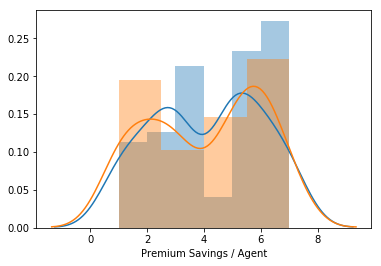

In [10]:
#Visualizing the data - displot
plot_income = sns.distplot(df["Premium Savings very important"])
plot_spend = sns.distplot(df["Agent Not Important"])
plt.xlabel('Premium Savings / Agent')

In [11]:
from sklearn.cluster import KMeans

### Using Elbow Method to find K

In [13]:
sse = []

for i in range(1,11):
    km=KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    sse.append(km.inertia_)

Text(0,0.5,'sse')

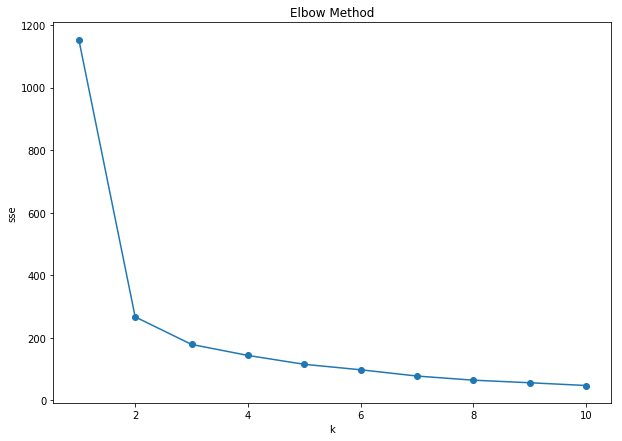

In [14]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range(1,11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel("k")
plt.ylabel("sse")

In [32]:
##Fitting kmeans to the dataset with k=3
km=KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(df)

In [33]:
## Add the labels to the original dataframe
df_res = df.copy()
df_res['Label'] = y_means

In [34]:
df_res.head()

,Premium Savings very important,Agent Not Important,Label
0,5,5,0
1,6,7,0
2,6,5,0
3,6,6,0
4,5,6,0


## Visualize the Results

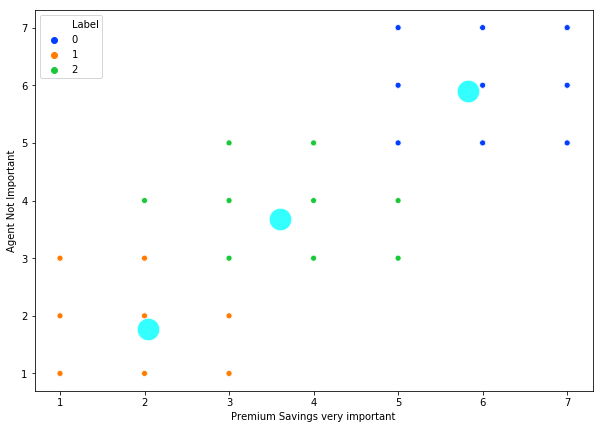

In [35]:
#Visualizing the clusters for k=5

#Set a color palette
bright_colors = sns.color_palette("bright", 3)

#Set figure size
fig, ax = plt.subplots(figsize=(10,7))

#Build the first plot 
sns.scatterplot(ax = ax, x=df_res['Premium Savings very important'], y=df_res['Agent Not Important'], hue=df_res.Label, 
                palette=bright_colors)

#Add on the cluster centers
centers = km.cluster_centers_
sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8, color='cyan')

## Cluster Analysis

### 0: Premium Savings V.I. (5-7) and Agents N.I. (5-7)
**These Customers:**
    * are Financially Literate (knows what they do)
    * have trust at their handling of premium savings
    * Independent and Reliant on their own (not needing an agent)
    * Knows the importance of premium savings 
#### Use-Cases for them: 
Create a Loyalty Awards for these customers, and several customer retention programs for them.


### 1: Premium Savings V.I. (1-3) and Agents N.I. (1-3)
**These Customers:**
    * are Financially Literate (knows what they do)
    * Can be Independent but would see the need and importance of an agent to assist them
    * Has the basic understanding of importance of premium savings 

#### Use-Cases for them: 
Create programs that would entice them to save on premium saving (Maybe a seminar or primer on the importance of premium savings, highlighting the pros) or also thin of ideas that would make them be more invested on their premium savings (but needs more data on their similarities of this particular customer group


### 2: Premium Savings V.I. (2-5) and Agents N.I. (2-5)
**These Customers:**
    * are Financially Illiterate (knows what they do)
    * Mostly Need Agent Assistance nearby
    * Doesn't see the importance of premium savings

#### Use-Cases for them: 
Set up Financial Literacy for Beginners for this group of customers, with emphasis on the importance of having premium saving. Additional Data, esp. for age demographic of this group, when it comes to seeing the need of an agent to assist them (possibly elders, or those who are investing for the first time). If they are composed of the young adult age demographic (20s - 30s), possibly create an app to help them, or a blog for financial literacy.